# Ejemplo de precio de equilibrio con minimos cuadrados
Una empresa desea saber el precio de equilibrio del cierto producto A, para ello la empresa la empresa recopila datos del producto A vendido a  diferentes precios (oferta) y la cantidad de productos (en cientos de miles) ofertados a esos precios (demanda). Obteniendo los datos que se muestran a continuación.

In [60]:
precio = [2.0,1.9,1.8,1.7,1.6,1.5,1.4,1.3,1.2,1.1]
demanda = [677,682,685,688, 696,699, 703, 705, 712,720]
oferta = [750, 740, 735, 725, 710, 705, 700, 685, 675, 650]

In [61]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [65]:
datos = pd.DataFrame({'precio': precio, 'demanda': demanda, 'oferta': oferta})
datos.head(3)

,precio,demanda,oferta
0,2.0,677,750
1,1.9,682,740
2,1.8,685,735


# Representación Gráfica


El primer paso antes de generar un modelo de regresión simple es representar los datos para poder intuir si existe una relación y cuantificar dicha relación mediante un coeficiente de correlación.

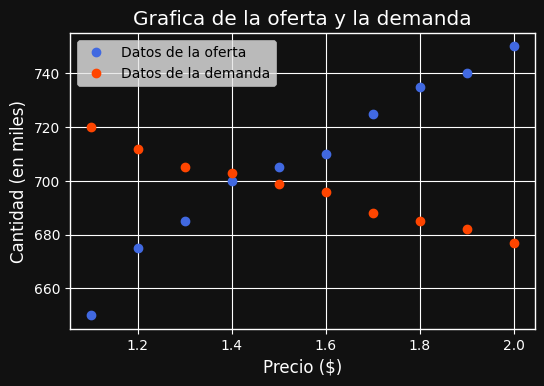

In [66]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))


#Gráfica del precio y de la demanda
plt.plot(precio, oferta, 'o', lw=2, label='Datos de la oferta', color='royalblue')
plt.plot(precio, demanda, 'o', lw=2, label='Datos de la demanda', color='orangered')

# Agregar etiquetas y título
plt.xlabel('Precio ($)', color='white')
plt.ylabel('Cantidad (en miles)', color='white')
plt.title('Grafica de la oferta y la demanda', color='white')
plt.legend()

# Configurar el color de fondo de la figura y fuera la figura como negro
plt.gca().set_facecolor('#111111')
plt.gcf().set_facecolor('#111111')

# Cambiar el color de los números en los ejes x e y a azul claro
plt.gca().tick_params(axis='x', colors='white')
plt.gca().tick_params(axis='y', colors='white')

plt.show()

ax.set_title('Gráfica de la demanda');

In [67]:
# Correlación lineal entre el precio y la oferta
# ==============================================================================
corr_test = pearsonr(x = precio, y =  oferta)
print("Coeficiente de correlación de Pearson de la oferta: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson de la oferta:  0.9852916701018184
P-value:  2.0116178243580842e-07


In [68]:
# Correlación lineal entre el precio y la demanda
# ==============================================================================
corr_test = pearsonr(x = precio, y =  demanda)
print("Coeficiente de correlación de Pearson de la demanda: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson de la demanda:  -0.9922992348270783
P-value:  1.5243848469924405e-08


Tanto la oferta como la demanda tienen buena correlación y además de que el valor p es menor a 0.05, por lo tanto rechazamos la hipotesis nula de que no hay correlación es decir, si hay correlación entre las variables.

# Ajuste del modelo


Se ajusta un modelo empleando como variable respuestanto la oferta como la demanda,uns y como predictel precioeos. Como en todo estudio predictivo, no solo es importante ajustar el modelo, sino también cuantificar su capacidad para predecir nuevas observaciones. Para poder hacer esta evaluación, se dividen los datos en dos grupos, uno de entrenamiento y otro de test.

In [69]:
# División de los datos en train y test para la oferta
# ==============================================================================
X = datos[['precio']]
y = datos['oferta']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Creación del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

LinearRegression()

In [70]:
# Información del modelo
# ==============================================================================
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(X, y))

Intercept: [548.]
Coeficiente: [('precio', 102.50000000000004)]
Coeficiente de determinación R^2: 0.9703455571227079


In [71]:
# División de los datos en train y test para la demanda
# ==============================================================================
X = datos[['precio']]
y = datos['demanda']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Creación del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

LinearRegression()

In [72]:
# Información del modelo
# ==============================================================================
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(X, y))

Intercept: [768.53571429]
Coeficiente: [('precio', -46.071428571428584)]
Coeficiente de determinación R^2: 0.9831915817670661


Obtenemos que la ecuación de la oferta está dada por:

y = 548 + 102.5x

Mientras que la ecuación de la demanda está dada por:

y = 768 - 46.07x

Por lo tanto el precio de equilibrio se obtiene en la intercepción de estas rectas.

Lo que nos da como resultado que el precio de equilibrio es de $1.53

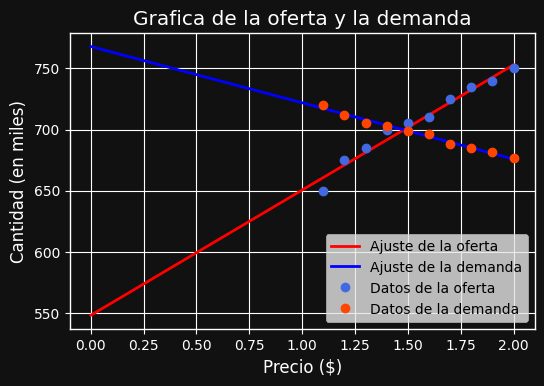

In [81]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

# Mostrar el ajuste de ambas rectas
x = np.linspace(0, 2, 100)
y_oferta = 548 + 102.5*x
y_demanda = 768 -46.07*x
plt.plot(x, y_oferta, 'r-', lw=2, label='Ajuste de la oferta')
plt.plot(x, y_demanda, 'b-', lw=2, label='Ajuste de la demanda')


#Gráfica del precio y de la demanda
plt.plot(precio, oferta, 'o', lw=2, label='Datos de la oferta', color='royalblue')
plt.plot(precio, demanda, 'o', lw=2, label='Datos de la demanda', color='orangered')

# Agregar etiquetas y título
plt.xlabel('Precio ($)', color='white')
plt.ylabel('Cantidad (en miles)', color='white')
plt.title('Grafica de la oferta y la demanda', color='white')
plt.legend()

# Configurar el color de fondo de la figura y fuera la figura como negro
plt.gca().set_facecolor('#111111')
plt.gcf().set_facecolor('#111111')

# Cambiar el color de los números en los ejes x e y a azul claro
plt.gca().tick_params(axis='x', colors='white')
plt.gca().tick_params(axis='y', colors='white')

plt.show()

ax.set_title('Gráfica de la demanda');

In [ ]:
# Mostrar el ajuste de ambas rectas en
x = np.linspace(0, 19043, 1000)
pdf = beta.pdf(x, *parametros)
plt.plot(x, pdf, 'r-', lw=2, label='Ajuste Beta')